In [137]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pprint
import seaborn

from wordcloud import WordCloud

In [138]:
mpl.rcParams['figure.dpi']= 600

In [139]:
keys = {'product/productId', 'review/userId', 'review/profileName', 'review/helpfulness',
        'review/score', 'review/time', 'review/summary', 'review/text'}

In [140]:
keys_to_ignore = {'review/profileName', 'review/helpfulness', 'review/time'}

In [169]:
# MAX_REVIEWS = 94197
MAX_REVIEWS = 550000
# Each review consists of 8 lines with key, value pairs and a newline that separates it from the next one
MAX_LINES = 9 * MAX_REVIEWS

line_no = 0
with open('foods.txt', 'r') as f:
    reviews = list()
    cur_review = dict()
    for line in f:
        line = line.rstrip()
        line_no += 1
        if line_no > MAX_LINES:
            break
        if line:
            try:
                key, value = line.split(': ', 1)
                if key not in keys_to_ignore:
                    cur_review[key] = value
            except Exception:
                pass
        else:
            reviews.append(cur_review)
            cur_review = dict()

In [170]:
print len(reviews), 'review(s)'

549999 review(s)


In [171]:
print len(reviews[0]), 'attribute(s)'
print reviews[0].keys()

5 attribute(s)
['review/summary', 'review/score', 'review/userId', 'review/text', 'product/productId']


In [172]:
pprint.pprint(reviews[0])

{'product/productId': 'B001E4KFG0',
 'review/score': '5.0',
 'review/summary': 'Good Quality Dog Food',
 'review/text': 'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
 'review/userId': 'A3SGXH7AUHU8GW'}


In [173]:
NUM_REVIEWS_IDX = 0
TOTAL_SCORE_IDX = 1

reviews_for_product = dict()
for review in reviews:
    product_id = review['product/productId']
    if product_id not in reviews_for_product:
        reviews_for_product[product_id] = [0, 0]
    reviews_for_product[product_id][NUM_REVIEWS_IDX] += 1
    reviews_for_product[product_id][TOTAL_SCORE_IDX] += float(review['review/score'])

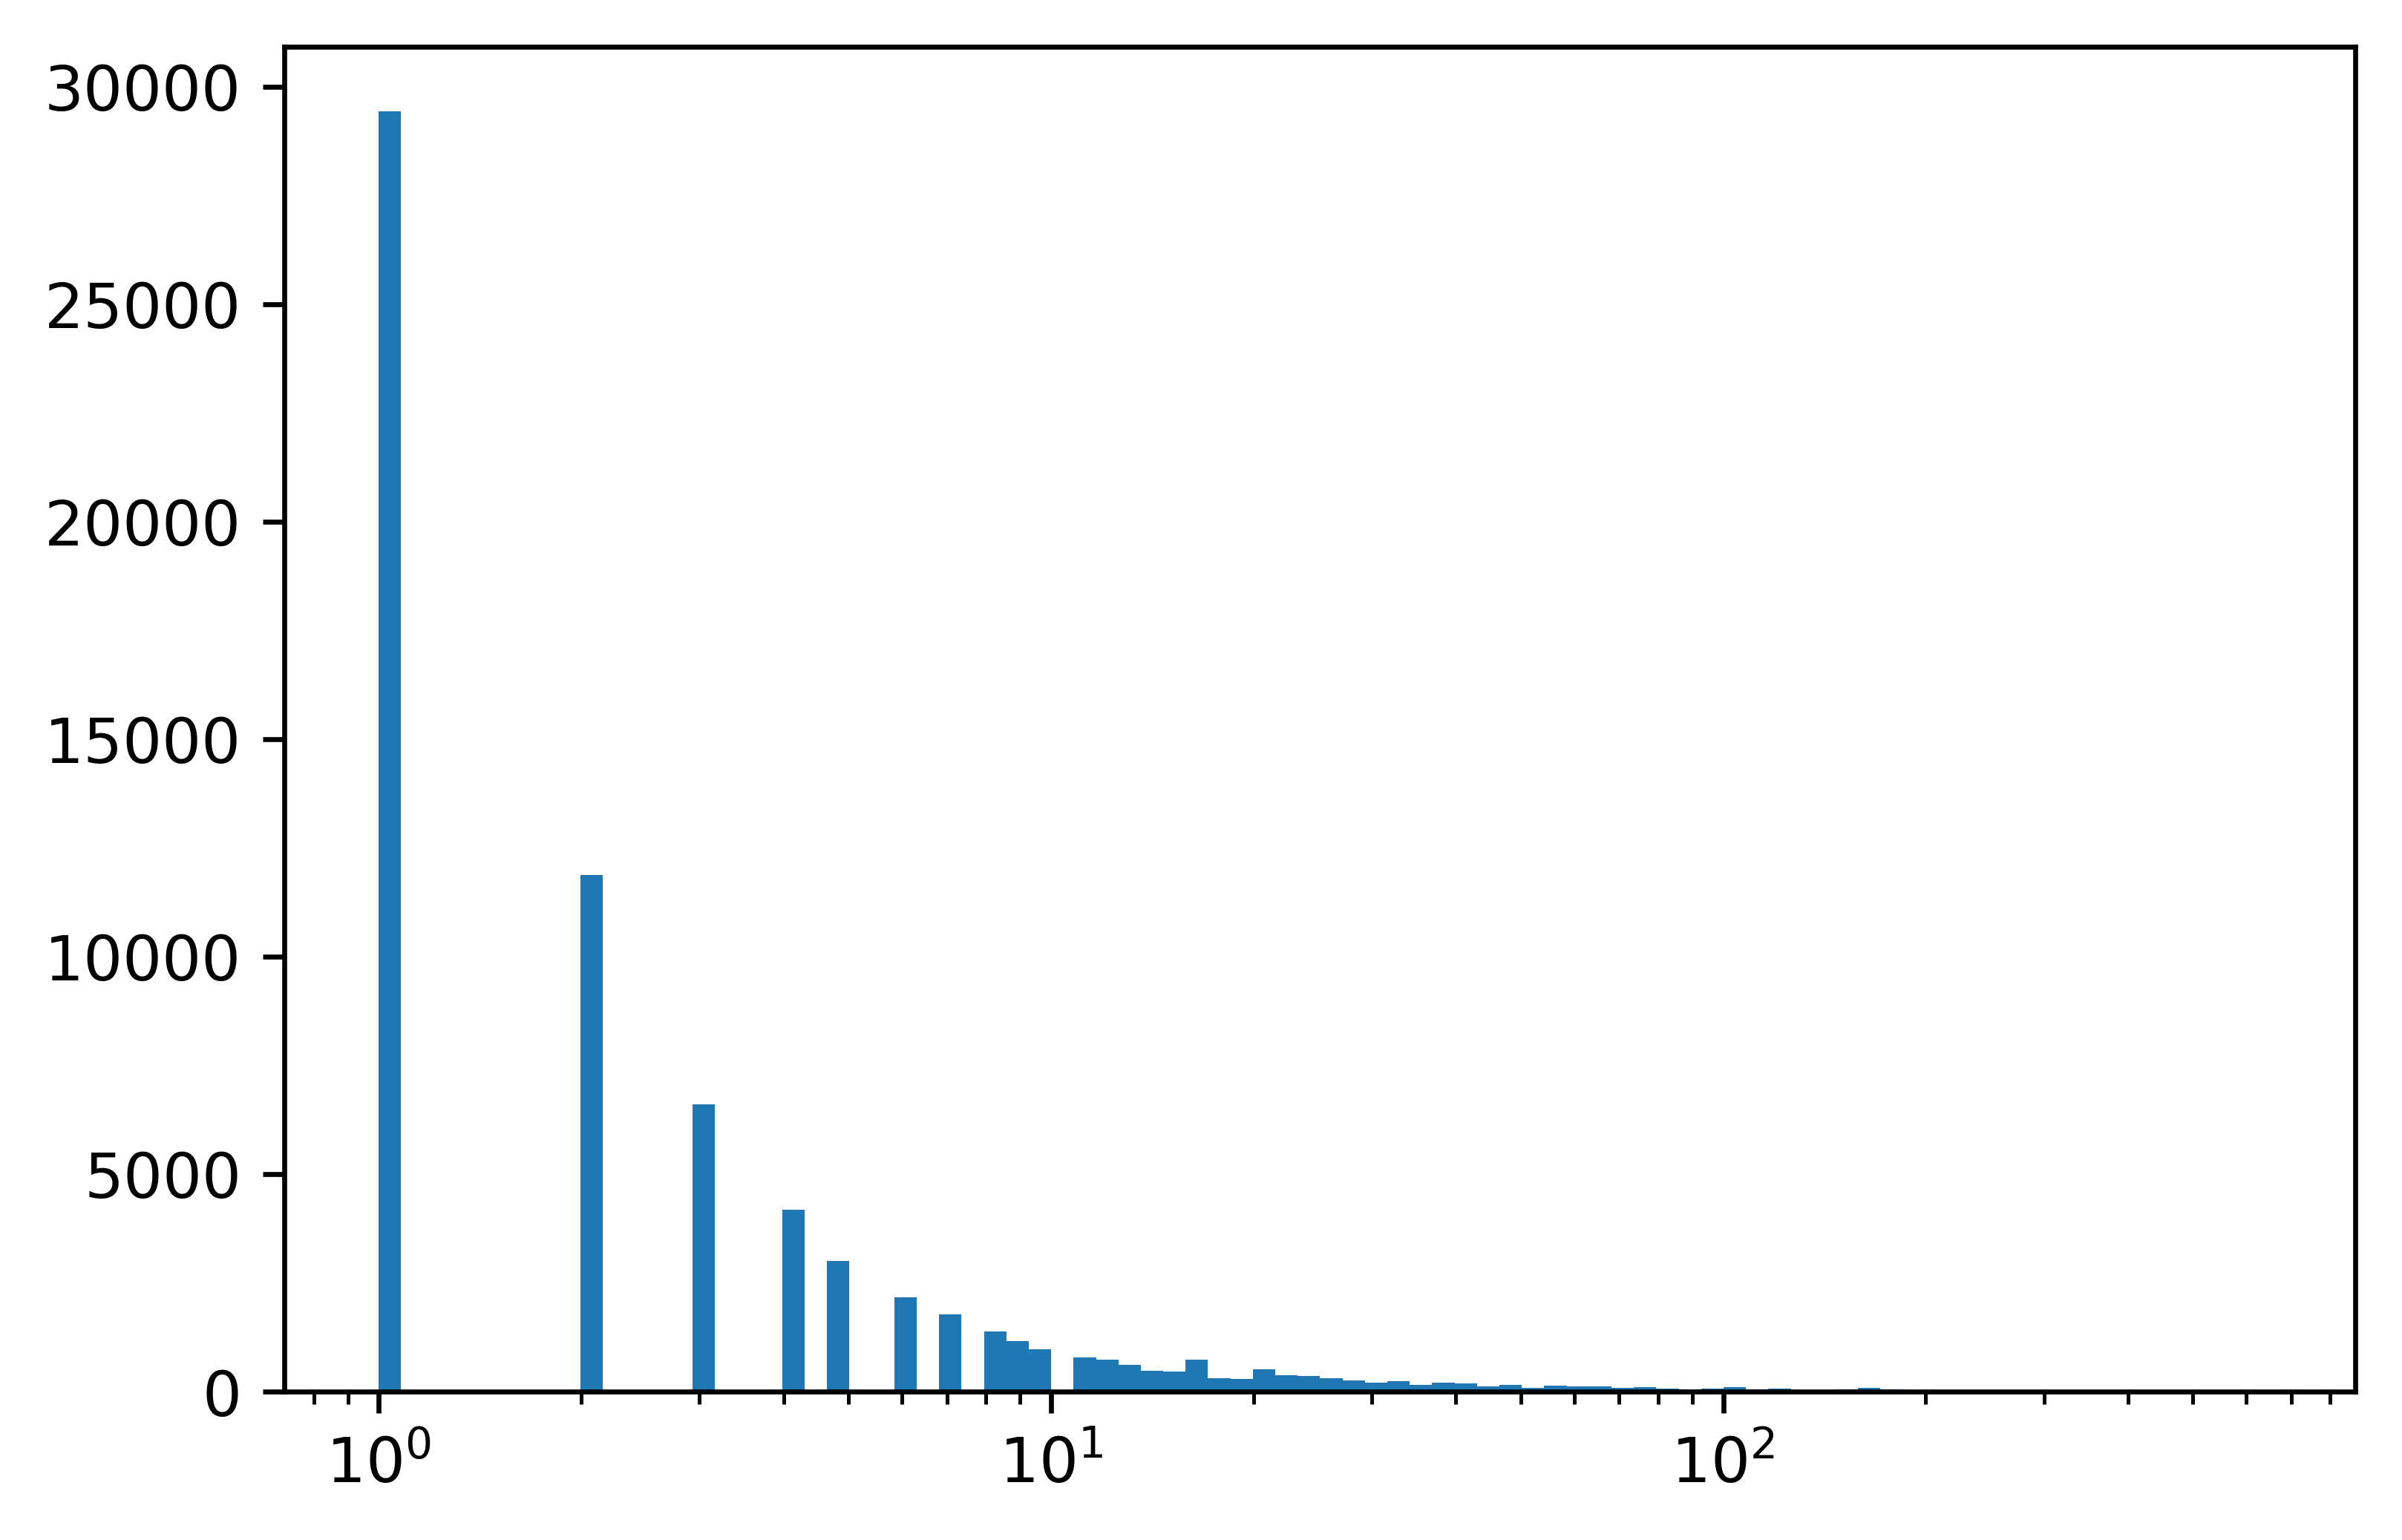

In [174]:
# Distribution of number of reviews per item
num_reviews = np.array([x[NUM_REVIEWS_IDX] for x in reviews_for_product.values()])

_, bins = np.histogram(np.log10(num_reviews), bins='auto')
plt.hist(num_reviews, bins=10**bins);
plt.gca().set_xscale("log")
plt.show()

In [175]:
# Filter out products that have very few reviews
MIN_REVIEWS = 5

filtered_reviews = list()
for product_id, review in reviews_for_product.items():
    if review[NUM_REVIEWS_IDX] >= MIN_REVIEWS:
        filtered_reviews.append((review[TOTAL_SCORE_IDX] / review[NUM_REVIEWS_IDX], product_id))

In [176]:
filtered_reviews.sort(reverse=True)

In [180]:
GOOD_THRESHOLD = 4.5
BAD_THRESHOLD = 2

good_reviews = set()
bad_reviews = set()

for rating, product_id in filtered_reviews:
    if rating >= GOOD_THRESHOLD:
        good_reviews.add(product_id)
    else:
        break

for rating, product_id in reversed(filtered_reviews):
    if rating <= BAD_THRESHOLD:
        bad_reviews.add(product_id)
    else:
        break

In [181]:
len(good_reviews)

7463

In [182]:
len(bad_reviews)

120

In [183]:
def get_review_text(filtered_ids):
    text = []
    for review in reviews:
        if review['product/productId'] in filtered_ids:
            text.append(review['review/summary']) #+ ' ' + review['review/text'])
    return text

In [184]:
good_review_text = ' '.join(get_review_text(good_reviews))
bad_review_text = ' '.join(get_review_text(bad_reviews))

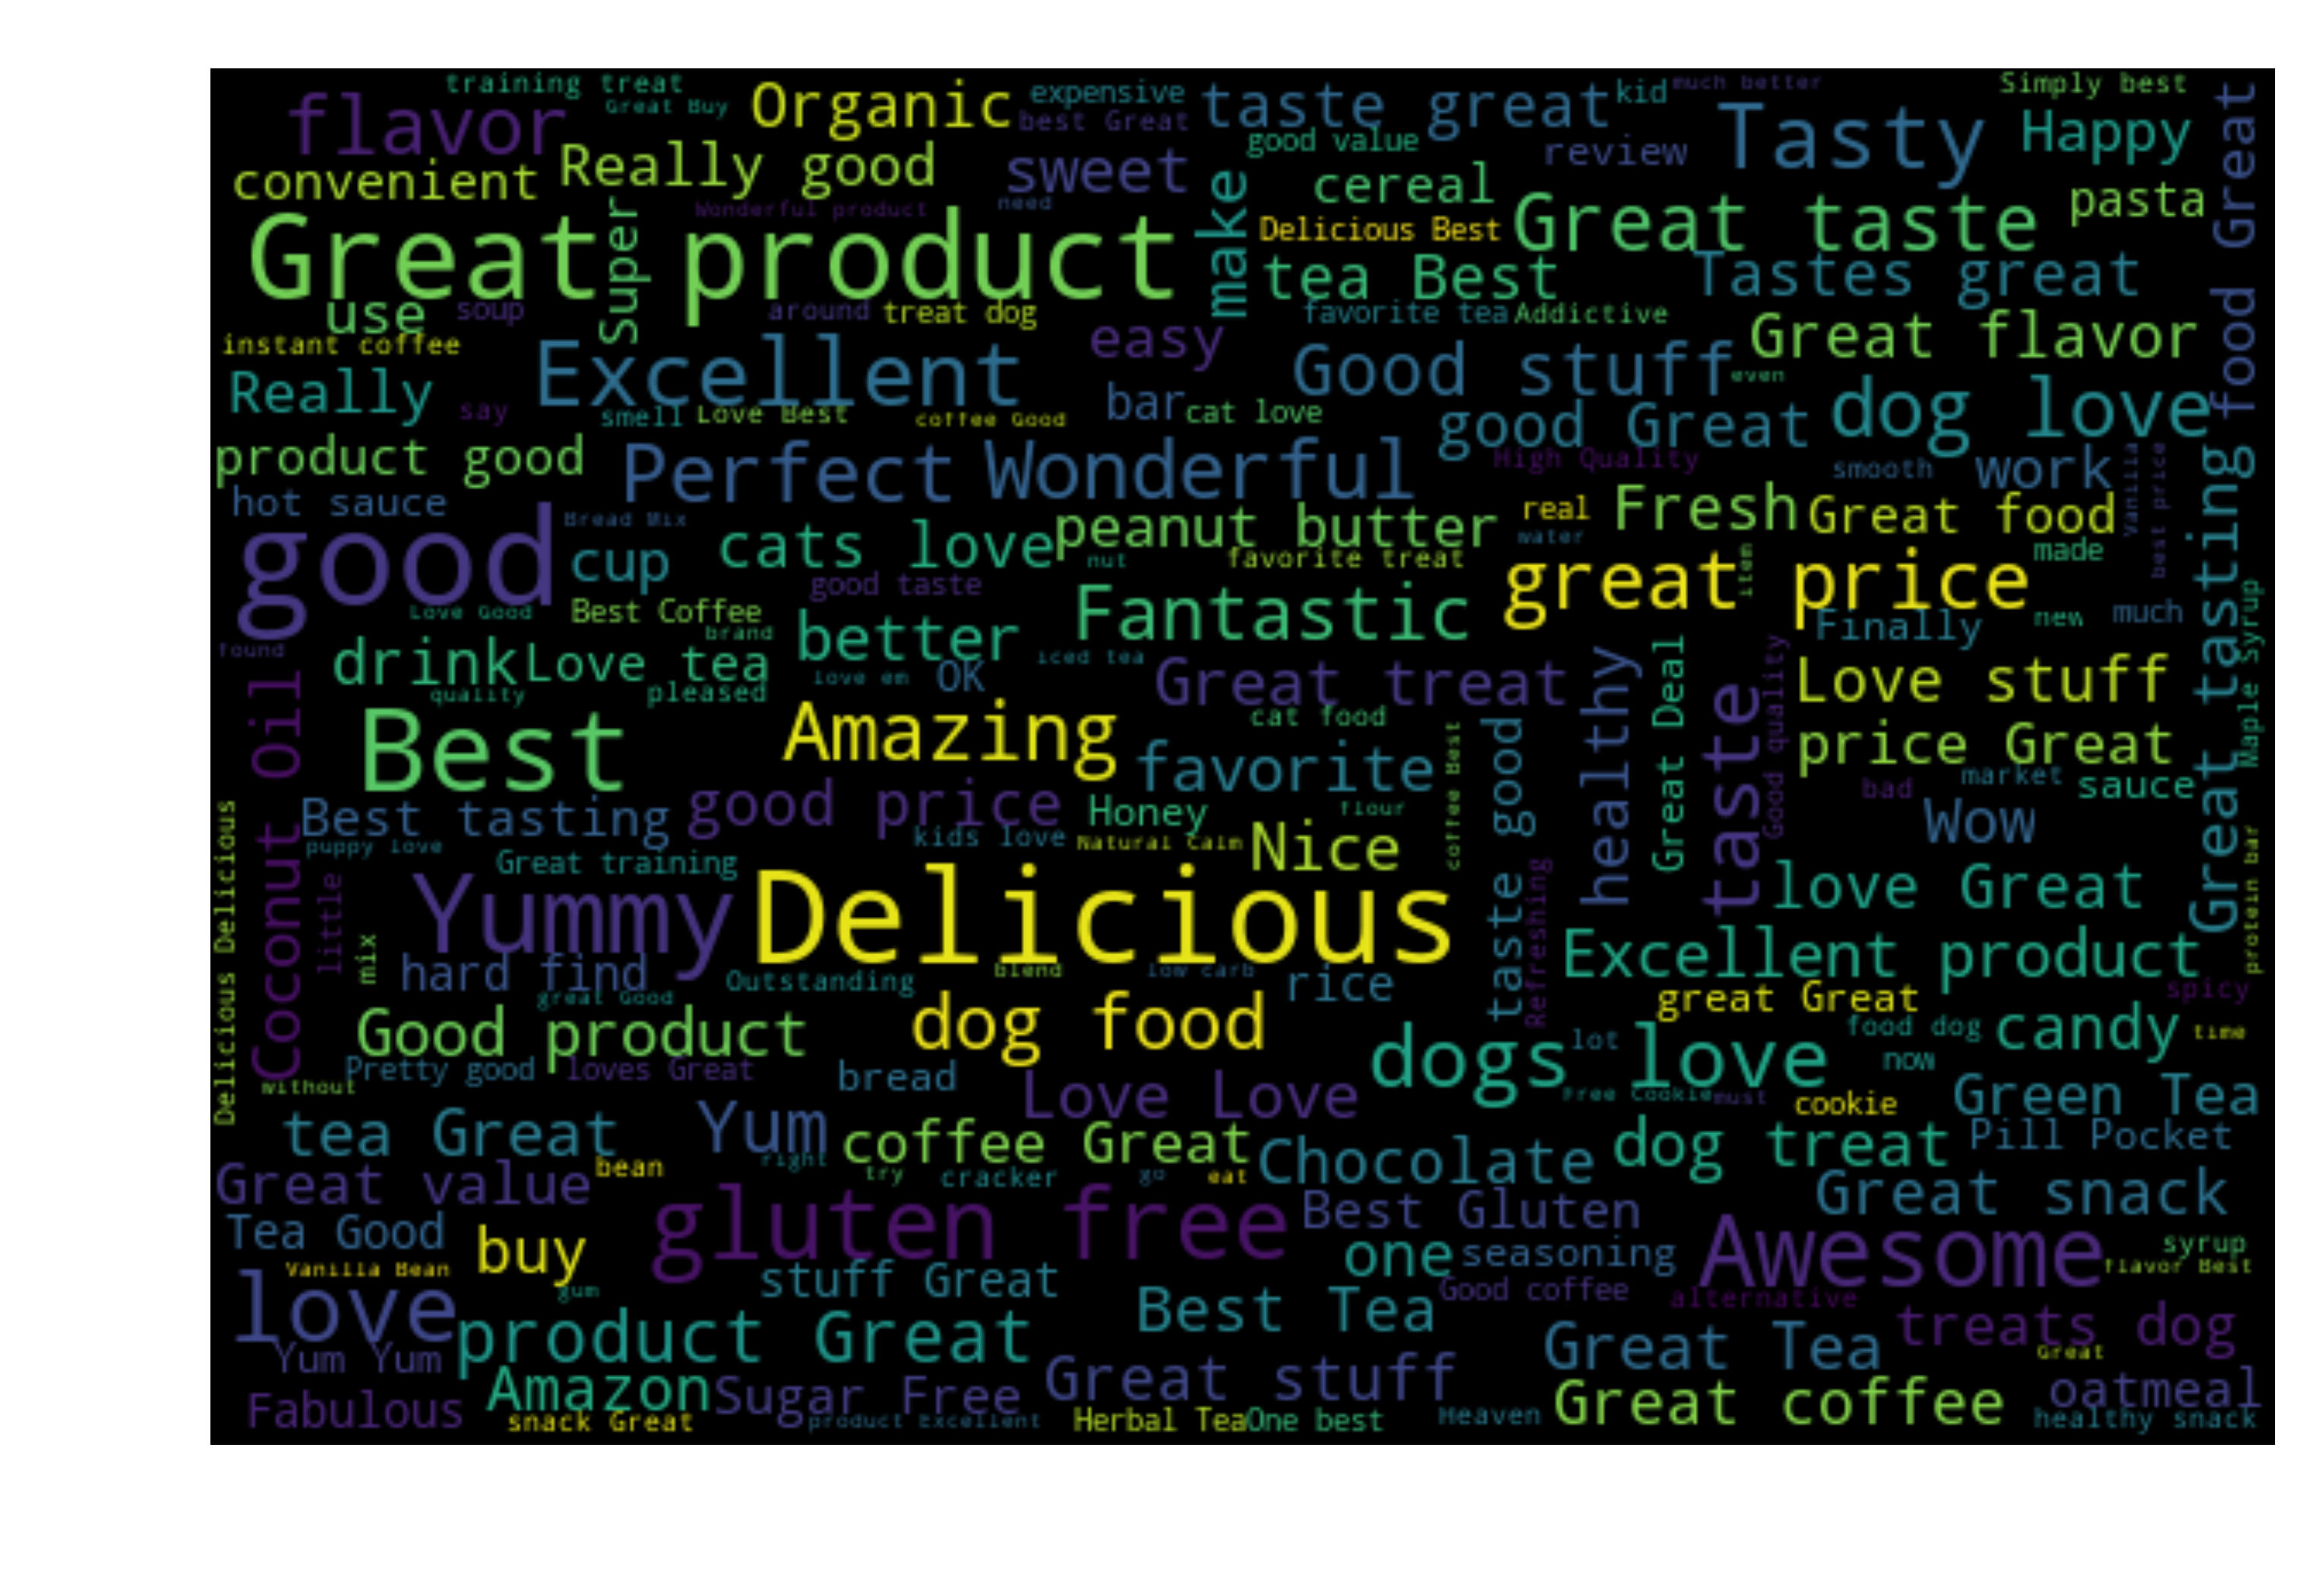

In [185]:
wordcloud = WordCloud(max_font_size=40, width=600, height=400).generate(good_review_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('good.png', bbox_inches='tight', transparent=True)
plt.show()

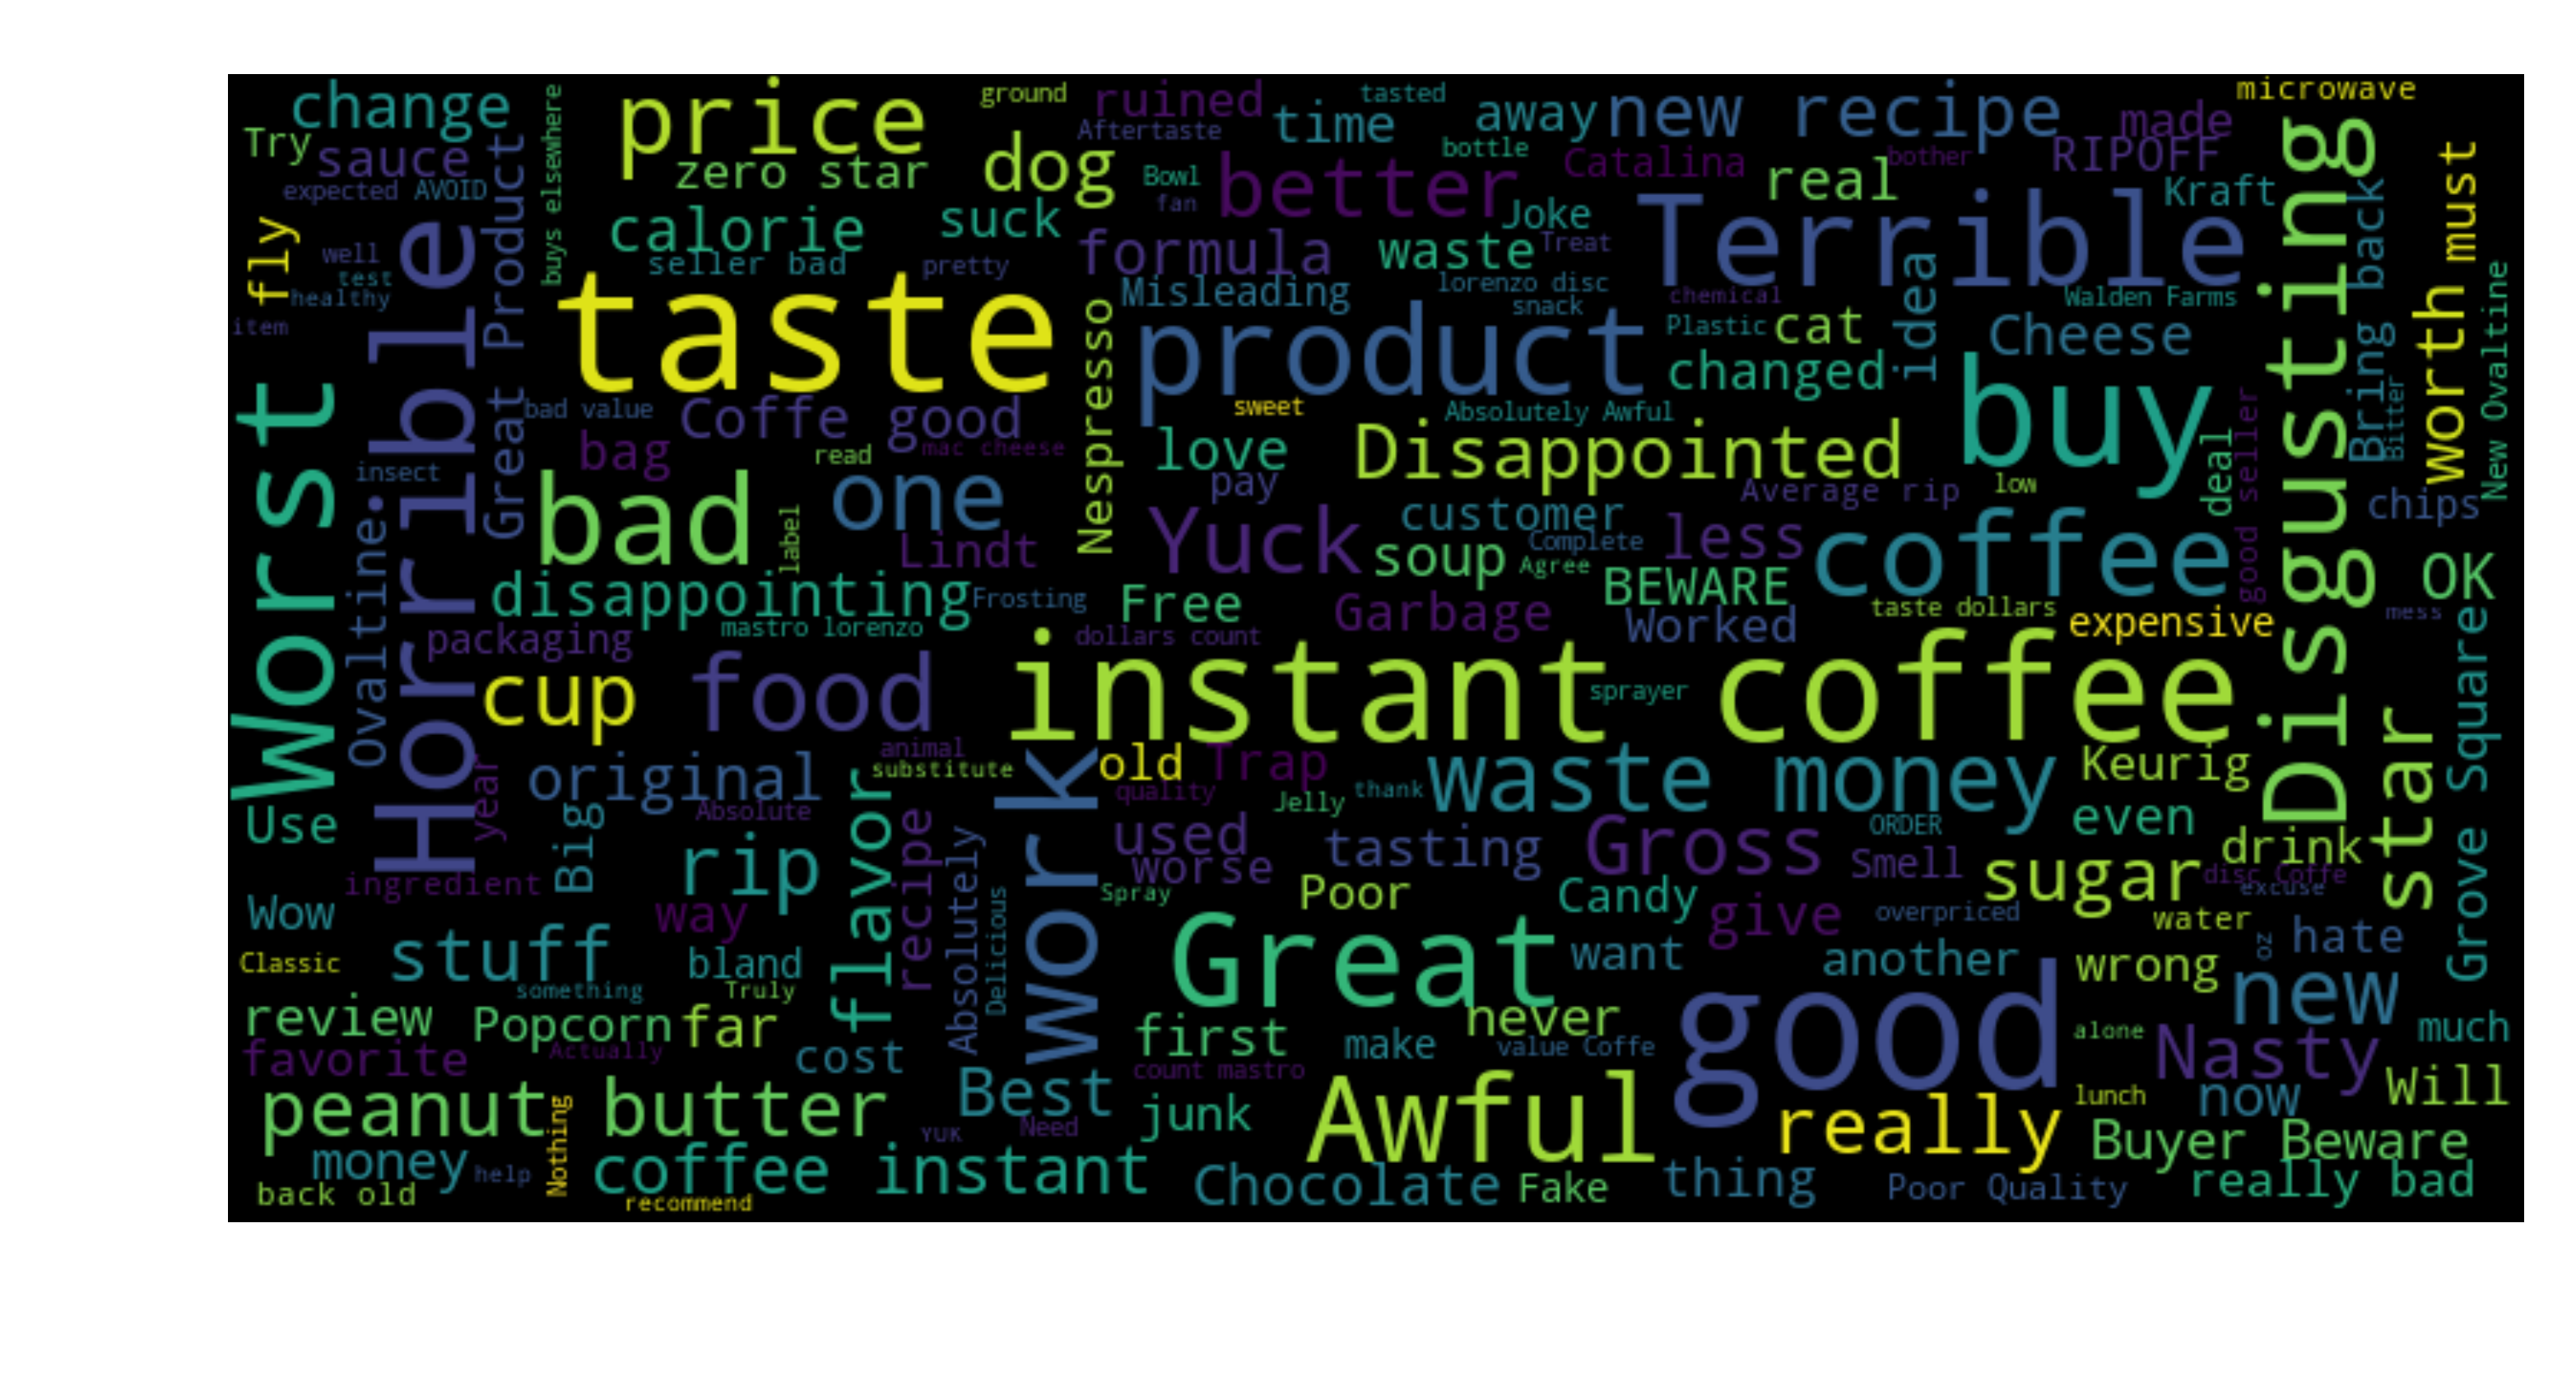

In [186]:
wordcloud = WordCloud(max_font_size=60, width=800, height=400).generate(bad_review_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('bad.png', bbox_inches='tight', transparent=True)
plt.show()